<a href="https://colab.research.google.com/github/skywalker0803r/teaching_material/blob/main/Perceptron_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron 基礎介紹

感知器（英語：Perceptron）是Frank Rosenblatt在1957年就職於康奈爾航空實驗室（Cornell Aeronautical Laboratory）時所發明的一種人工神經網路。它可以被視為一種最簡單形式的前饋神經網路，是一種二元線性分類器。

Frank Rosenblatt給出了相應的感知機學習算法，常用的有感知機學習、最小二乘法和梯度下降法。譬如，感知機利用梯度下降法對損失函數進行極小化，求出可將訓練數據進行線性劃分的分離超平面，從而求得感知機模型。

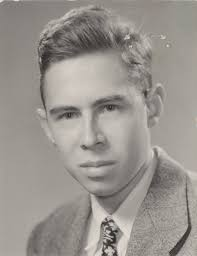

神經細胞結構示意圖
感知機是生物神經細胞的簡單抽象。神經細胞結構大致可分為：樹突、突觸、細胞體及軸突。單個神經細胞可被視為一種只有兩種狀態的機器——激動時為『是』，而未激動時為『否』。神經細胞的狀態取決於從其它的神經細胞收到的輸入信號量，及突觸的強度（抑制或加強）。當信號量總和超過了某個閾值時，細胞體就會激動，產生電脈衝。電脈衝沿著軸突並通過突觸傳遞到其它神經元。為了模擬神經細胞行為，與之對應的感知機基礎概念被提出，如權量（突觸）、偏置（閾值）及激活函數（細胞體）。

在人工神經網絡領域中，感知機也被指為單層的人工神經網絡，以區別於較複雜的多層感知機（Multilayer Perceptron）。作為一種線性分類器，（單層）感知機可說是最簡單的前向人工神經網絡形式。儘管結構簡單，感知機能夠學習並解決相當複雜的問題。感知機主要的本質缺陷是它不能處理線性不可分問題。

![img](https://miro.medium.com/max/424/1*J0zzv7JjJOUh6ycSOVfl3Q.png)

Perceptron 在程式中實際運作流程圖如下

![img](https://pythonmachinelearning.pro/wp-content/uploads/2017/09/Single-Perceptron.png.webp)

# 課程大綱

* 1 導入函式庫
* 2 製作數據
* 3 定義感知器模型架構
* 4 訓練感知器模型(用梯度下降法)
* 5.評估感知器模型
* 6.作業練習

# 1.導入套件

In [1]:
# jax 可以想成有微分功能的numpy
import jax
import jax.numpy as jnp
from jax import random
import numpy as np

# 進度條
from tqdm import tqdm_notebook as tqdm

# 機器學習套件庫sklearn
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs

# 繪圖用
import matplotlib.pyplot as plt

# 整理&操作表格數據用
import pandas as pd

# 畫出散點圖用
def plot_data(class_zero,class_one):
  plt.scatter(class_zero.x1,class_zero.x2,label='class_zero',color='red')
  plt.scatter(class_one.x1,class_one.x2,label='class_one',color='blue')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.legend()

# 畫出決策表面用
def plot_decision_surface(X,predict_fn):
  min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
  min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
  x1grid = np.arange(min1, max1, 0.05)
  x2grid = np.arange(min2, max2, 0.05)
  xx, yy = np.meshgrid(x1grid, x2grid)
  r1, r2 = xx.flatten(), yy.flatten()
  r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
  grid = np.hstack((r1,r2))
  yhat = predict_fn(grid)
  zz = yhat.reshape(xx.shape)
  plt.contourf(xx,yy,zz,cmap='Paired')
  plt.contour(xx,yy,zz,color='black',lw=0.5)

# 2.製作數據

這裡以一個簡單的二分類數據當範例 特徵有 x1,x2 輸出為y(0或1)

In [2]:
X, y = make_blobs(n_samples=100,centers=2, n_features=2,random_state=0)
df = pd.DataFrame()
df['x1'] = X[:,0]
df['x2'] = X[:,1]
df['y'] = y
df.head()

,x1,x2,y
0,4.218503,2.234192,1
1,0.907799,0.459844,1
2,-0.276525,5.081278,0
3,0.088484,2.322991,0
4,3.243297,1.214606,1


針對上面的表格數據,可以用視覺化套件繪製出來幫助我們更好的理解數據

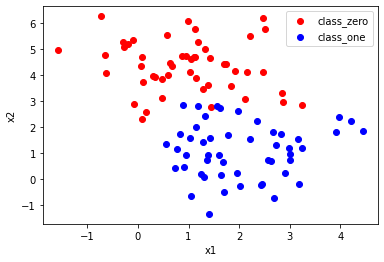

In [3]:
plot_data(df[df.y == 0],df[df.y == 1])

# 3.定義感知器模型參數

在開始正式訓練之前我們先把模型建立起來 並隨機設定其中的weight(權重) 和bias(偏置) 看看這樣隨機的參數表現如何

首先看看random這個模塊底下提供哪些隨機分佈

In [4]:
dir(random)

['PRNGKey',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'bernoulli',
 'beta',
 'categorical',
 'cauchy',
 'choice',
 'dirichlet',
 'double_sided_maxwell',
 'exponential',
 'fold_in',
 'gamma',
 'gumbel',
 'laplace',
 'logistic',
 'maxwell',
 'multivariate_normal',
 'normal',
 'pareto',
 'permutation',
 'poisson',
 'rademacher',
 'randint',
 'random_gamma_p',
 'shuffle',
 'split',
 't',
 'threefry2x32_p',
 'threefry_2x32',
 'truncated_normal',
 'uniform',
 'weibull_min']

底下用均勻分佈當範例,bias則是人工設置為0.0,其實有很多初始化方法大家可以去try

In [5]:
key = random.PRNGKey(0)
params = {
    'w': random.uniform(key,minval=0.0,maxval=1.0,shape=(2,)),
    'b': 0.
}

定義前項傳播方法 output = σ(xw+b),在這σ代表激勵函數,這裡使用sigmoid

大家也可以改成其他激勵函數試試看 例如relu

In [6]:
dir(jax.nn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'celu',
 'elu',
 'gelu',
 'glu',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'hard_tanh',
 'initializers',
 'leaky_relu',
 'log_sigmoid',
 'log_softmax',
 'logsumexp',
 'normalize',
 'one_hot',
 'relu',
 'relu6',
 'selu',
 'sigmoid',
 'silu',
 'soft_sign',
 'softmax',
 'softplus',
 'swish']

In [7]:
def forward(params,X):
    return jax.nn.sigmoid(jnp.dot(X,params['w'] + params['b']))

forward 輸出值經過 sigmoid函數 會被限制在0~1之間

![img](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F5152157%2F366ce717ad74dfe967a940d9a2161f9b%2Fmain-qimg-6b67bea3311c3429bfb34b6b1737fe0c.jpg?generation=1605711218576073&alt=media)



In [8]:
y_pred = forward(params,df[['x1','x2']].values)
y_pred

DeviceArray([0.9375562 , 0.63786834, 0.9824702 , 0.86842585, 0.8426666 ,
             0.9267178 , 0.9715659 , 0.9411892 , 0.96594316, 0.6078111 ,
             0.97639513, 0.70972216, 0.98903835, 0.9711807 , 0.85241693,
             0.9199244 , 0.63219965, 0.9622165 , 0.62494284, 0.8074417 ,
             0.9821816 , 0.97466034, 0.90440774, 0.98439294, 0.7579761 ,
             0.9816533 , 0.5843682 , 0.9940018 , 0.98264325, 0.9086668 ,
             0.58994603, 0.9807263 , 0.7250103 , 0.5922018 , 0.9281954 ,
             0.97773504, 0.74002886, 0.9261744 , 0.9490896 , 0.76801765,
             0.90914786, 0.9944313 , 0.9923968 , 0.96114516, 0.92240983,
             0.84723437, 0.5544307 , 0.4960448 , 0.9756714 , 0.98972523,
             0.6482975 , 0.75053746, 0.9960037 , 0.9868383 , 0.9522746 ,
             0.98240936, 0.95237005, 0.74685407, 0.8350504 , 0.50333977,
             0.8281801 , 0.9771509 , 0.98645705, 0.83745897, 0.99240404,
             0.93151766, 0.9533863 , 0.9640853 , 0.

我們實際有兩個類別0和1,所以可以把模型原始輸出再做轉換 大於0.5的變成1小於0.5的變成0

In [9]:
y_pred = (y_pred>=0.5).astype(int)
y_pred

DeviceArray([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1],            dtype=int32)

In [10]:
df['y_pred'] = list(y_pred)

看看正確率如何(訓練前)

In [11]:
accuracy_score(df['y'].values,df['y_pred'].values)

0.47

可視化預測結果

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: The following kwargs were not used by contour: 'color', 'lw'


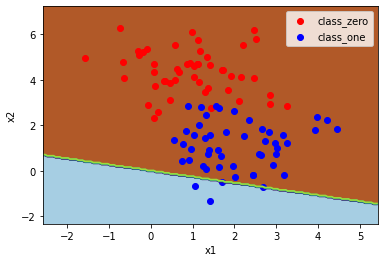

In [12]:
plot_decision_surface(df[['x1','x2']].values,lambda x:(forward(params,x)>=0.5).astype(int))
plot_data(df[df.y == 0],df[df.y == 1])
plt.show()

# 4.訓練感知器模型(用梯度下降法)

梯度下降解決的問題是這樣的

1.給定一個損失函數例如:J(w)

2.找到一組w讓J(w)最小

![img](https://miro.medium.com/max/700/0*owEkv2m9XluM2Ta_.png)

梯度下降求解的思路是這樣的:

1.對每一個w去計算∂J(w)/ ∂w(所謂的梯度)

2.根據梯度的方向和大小去更新w

3.通常會在梯度前面乘上一個learning_rate(控制更新步長)

![img](https://miro.medium.com/max/700/0*qKCRY2P2eAbClDcm.gif)

定義一個損失函數(loss_function)簡稱J(吃模型的參數(params)(weight和bias)吐出loss)

In [13]:
def J(params):
  y_pred = forward(params,X) # 預測值
  loss = jnp.mean(jnp.square(y_pred - y)) # 預測值跟真實值之間的mse loss
  return loss
loss = J(params)
print('loss:',loss)

loss: 0.50943154


對損失函數求偏微分(梯度),這裡使用jax套件提供的功能非常方便,可以輕鬆取得 損失函數 的 導函數

導函數複習： 若有函數 f(x) = x**2 則其導函數 f'(x) = 2x

In [14]:
grad_fn = jax.grad(J) #損失函數的導函數
grad = grad_fn(params) #利用導函數求導數(梯度)
print('grad:',grad)

grad: {'b': DeviceArray(0.03107279, dtype=float32), 'w': DeviceArray([-0.06177379,  0.09284658], dtype=float32)}


用 梯度下降公式 更新模型參數

![img](https://miro.medium.com/max/279/0*MyJf92jsXJMpumzx.png)

這裡α代表lr(learning rate)學習率,也是可以改的大家可以改看看

In [15]:
def update(params, grads,lr = 0.01): # lr代表學習率
  new_params = jax.tree_multimap(lambda p, g: p - lr * g, params, grads)
  return new_params

print('舊參數',params)
new_params = update(params,grad_fn(params))
print('新參數:',new_params)

舊參數 {'w': DeviceArray([0.21629536, 0.8041241 ], dtype=float32), 'b': 0.0}
新參數: {'b': DeviceArray(-0.00031073, dtype=float32), 'w': DeviceArray([0.2169131 , 0.80319566], dtype=float32)}


所謂的機器學習(訓練)其實就是反覆執行多次參數更新,
這裡的多次又稱通常又幾個epoch,也是可以改的大家可以改改看

In [16]:
loss_history = [] # 紀錄每一步的loss
for i in tqdm(range(1000)):
  loss = J(params)
  loss_history.append(loss)
  grads = grad_fn(params)
  params = update(params, grads)
  if i%50 == 0:
    print('epoch:',i,'loss:',loss)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


epoch: 0 loss: 0.50943154
epoch: 50 loss: 0.5010134
epoch: 100 loss: 0.48411986
epoch: 150 loss: 0.42192855
epoch: 200 loss: 0.23567177
epoch: 250 loss: 0.1917816
epoch: 300 loss: 0.16700983
epoch: 350 loss: 0.1496349
epoch: 400 loss: 0.13722864
epoch: 450 loss: 0.1281215
epoch: 500 loss: 0.1212389
epoch: 550 loss: 0.11589715
epoch: 600 loss: 0.11165346
epoch: 650 loss: 0.108213596
epoch: 700 loss: 0.105376676
epoch: 750 loss: 0.10300183
epoch: 800 loss: 0.10098791
epoch: 850 loss: 0.09926067
epoch: 900 loss: 0.09776458
epoch: 950 loss: 0.09645727



觀察 loss下降曲線

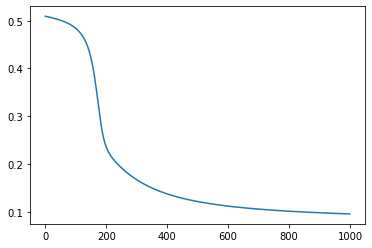

In [17]:
plt.plot(loss_history)

# 5.評估感知器模型(訓練後)

In [18]:
y_pred = forward(params,df[['x1','x2']].values)
y_pred = (y_pred>=0.5).astype(int)
df['y_pred'] = list(y_pred)
accuracy_score(df['y'].values,df['y_pred'].values)

0.87

可視化預測結果

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: The following kwargs were not used by contour: 'color', 'lw'


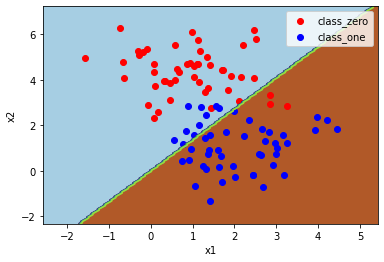

In [19]:
plot_decision_surface(df[['x1','x2']].values,lambda x:(forward(params,x)>=0.5).astype(int))
plot_data(df[df.y == 0],df[df.y == 1])
plt.show()

# 6.作業練習

* 1.實驗調整初始化權重方法 例如我是用uniform分佈初始化w,改成normal分佈會有什麼影響?？

* 2.實驗調整激勵函數 或是不要加激勵函數 會有什麼影響？

* 3.實驗調整學習率(lr)會有什麼影響？